In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load the data
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [4]:
# take out label column
labels = train['label']
train = train.drop('label', 1)

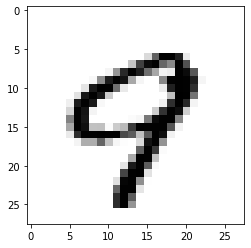

In [6]:
# how it looks like 
image = train.values[100]
plt.imshow(image.reshape(28, 28), cmap='Greys')
plt.show()

In [8]:
# split data
x_train, x_test, y_train, y_test = train_test_split(train.values, labels, test_size = 0.3, random_state = 0)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400,)
(12600,)


In [11]:
# setup model
knn_clf = KNeighborsClassifier()

In [13]:
# train it
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
# try make predictions
predictions = knn_clf.predict(x_test)

In [16]:
# check accuracy
print ("Accuracy score:", accuracy_score(predictions, y_test))

Accuracy score: 0.9657142857142857


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(predictions, y_test))
print (confusion_matrix(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1263
           1       0.99      0.96      0.97      1480
           2       0.96      0.98      0.97      1242
           3       0.96      0.96      0.96      1305
           4       0.96      0.98      0.97      1209
           5       0.96      0.96      0.96      1128
           6       0.99      0.97      0.98      1276
           7       0.97      0.96      0.96      1348
           8       0.91      0.99      0.95      1111
           9       0.95      0.94      0.95      1238

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600

[[1232    0   12    1    1    3    3    1    5    5]
 [   0 1418   16    3   12    1    1   15   12    2]
 [   3    5 1220    4    0    1    0    6    1    2]
 [   0    0    4 1250    0   14    0    0   30    7]
 [   0    0    0    0 1184   